# Logistic Regression

* The Logistic Regression Algorithm deals in discrete values whereas the Linear Regression Algorithm handles predictions in continuous values. This means that Logistic Regression is a better option for binary classification. An event in Logistic Regression is classified as 1 if it occurs and it is classified as 0 otherwise. Hence, the probability of a particular event occurrence is predicted based on the given predictor variables.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [25]:
df=pd.read_csv('titanic_train.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* There should be no missing Entries,Categorical data for algorithm


# EDA-(Exploratory Data Analysis)

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
100*pd.isnull(df).sum()/len(df)
#Finding out number of missing enteries in every columns

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Strategies for  Handling Missing Data 
* Identify Missing Data 
* Discard the columns having too much of missing data (>25%)
* Discard the rows having missing entries, if the missing enteries are too less(<5%)
* Treat/Input the missing entries in columns
* Try to fill fake enteries which doesn't impact overall data
* fill using mean values

* fill using some inputers 
-----------------------------------
* Refer online for more handling

<AxesSubplot:>

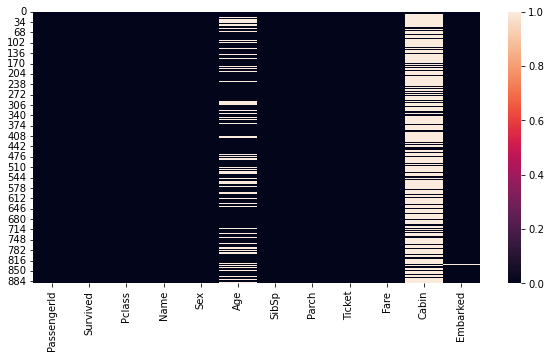

In [31]:
# Visualizing Missing Entries through Graphs
figure=plt.figure(figsize=(10,5))
sns.heatmap(pd.isnull(df))
#Here you can also see cabin is full of NULL values

* Cabin will be droped down as there is no way we will be inputing soo many values in cabin column(as to handle missing data)

In [32]:
#Observing from the above heat map we can also see there are some missing enteries
df['Age'].isnull().sum()
#this will give the total Missing enteries

177

In [33]:
# Age is something we can fill in this case
# In order to fill we will be using the mean values 
df['Age'].mean()
# Mean age of the people present at the titanic is 29.something
#Using this we will input all the  missing enteries
#This is one of the easiest method of filling missing enteries as to fill their mean values which will not affect the model prediction and training data

29.69911764705882

In [34]:
#Checking again for null values
df["Age"].isnull().sum()
#After this we will be begning with the univariate analysis

177

In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Univariate Analysis

In [37]:
target='Survived'
cat_cols=['Sex','Embarked','Pclass']
num_cols=['Age','SibSp','Parch','Fare']#Here parch is the showing who were travelling with parents
Drop_cols=['Cabin','PassengerId','Name','Ticket']#As These columns as nothing to do with our prediction we will drop them

Sex
female    314
male      577
Name: Sex, dtype: int64


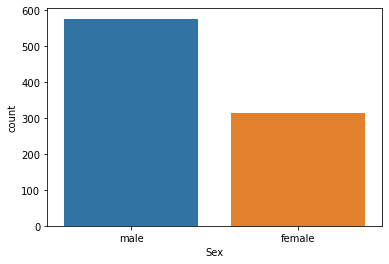

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


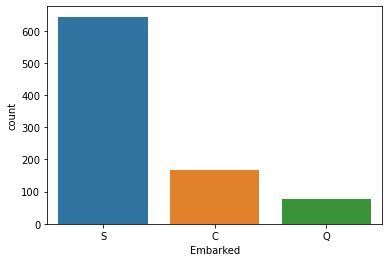

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


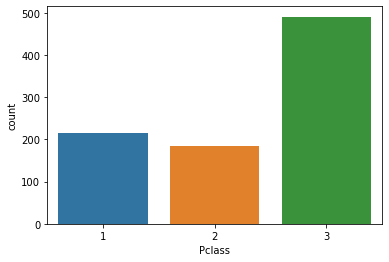

In [38]:
#Analyzing categorical columns
def cat_analyze(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data=df,x=col)#hue=df['Survived'] We can also do this but it will become bivariate
    plt.show()
for col in cat_cols:
    cat_analyze(col)

Age


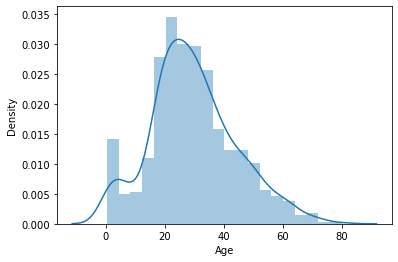

SibSp


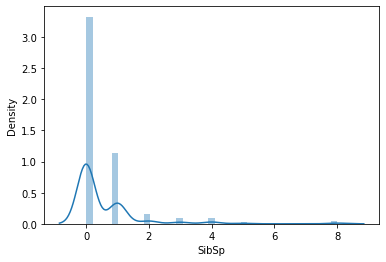

Parch


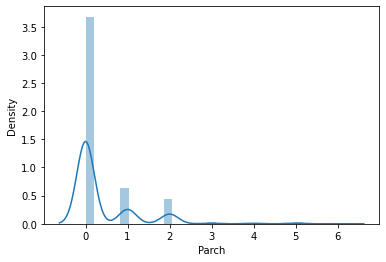

Fare


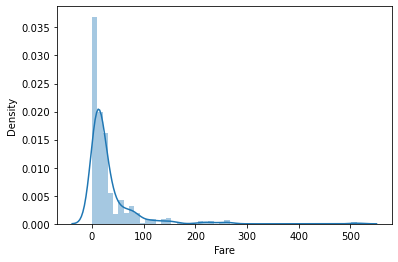

In [39]:
#Analyzing Numerical Columns
def num_analyze(col):
    print(col)
    sns.distplot(df[col])
    plt.show()
for col in num_cols:
    num_analyze(col)

# Bivariate Analysis

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


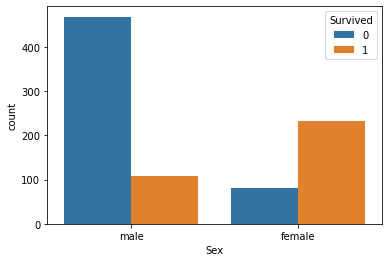

Embarked
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64


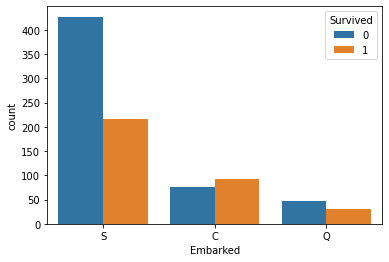

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


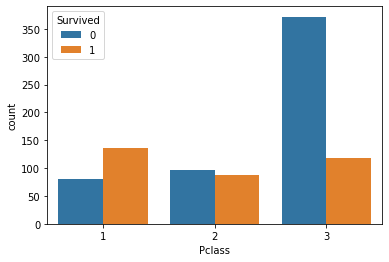

In [40]:
def cat_bivariate(col):
    print(col)
    print(df.groupby(target)[col].value_counts().sort_index())
    sns.countplot(data=df,x=col,hue=target)
    plt.show()
for col in cat_cols:
    cat_bivariate(col)

Age
Survived  Age 
0         1.0     2
          2.0     7
          3.0     1
          4.0     3
          6.0     1
                 ..
1         58.0    3
          60.0    2
          62.0    2
          63.0    2
          80.0    1
Name: Age, Length: 142, dtype: int64


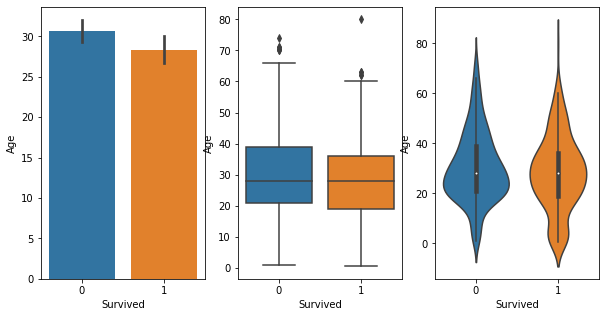

SibSp
Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: SibSp, dtype: int64


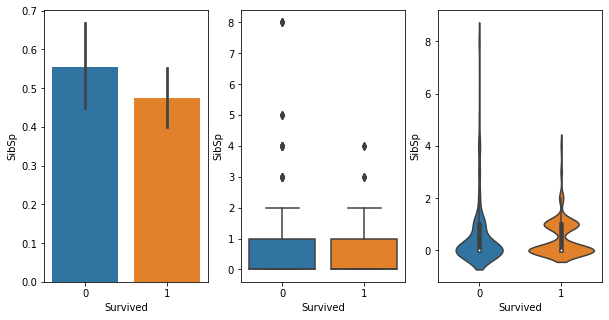

Parch
Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Parch, dtype: int64


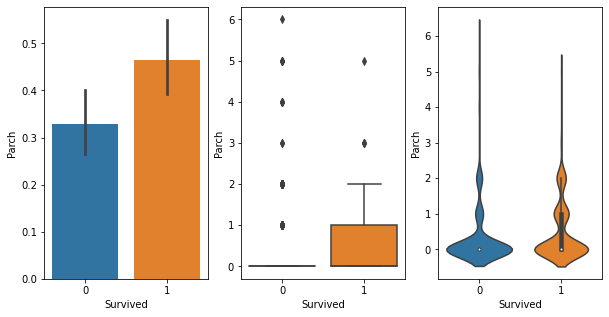

Fare
Survived  Fare    
0         0.0000      14
          4.0125       1
          5.0000       1
          6.2375       1
          6.4375       1
                      ..
1         227.5250     3
          247.5208     1
          262.3750     2
          263.0000     2
          512.3292     3
Name: Fare, Length: 330, dtype: int64


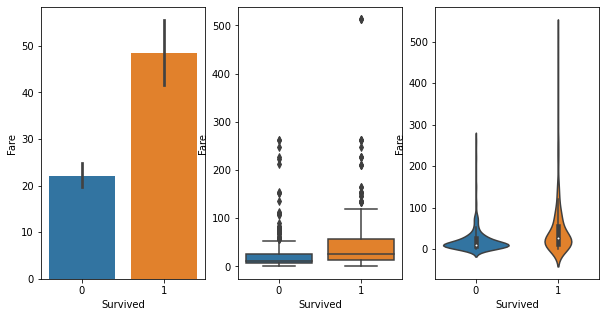

In [41]:
def num_bivariate(col):
    print(col)
    print(df.groupby(target)[col].value_counts().sort_index())
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    sns.barplot(data=df,x=target,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target,y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=target,y=col)
    plt.show()
for col in num_cols:
    num_bivariate(col)

<AxesSubplot:>

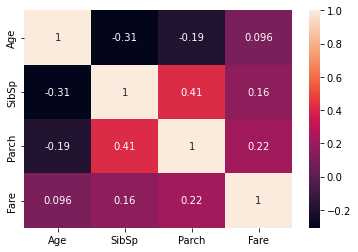

In [42]:
sns.heatmap(df[num_cols].corr(),annot=True)

# Multivariate Analysis

In [43]:
# We will be needing some colours for our graph
from random import choice 
list=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

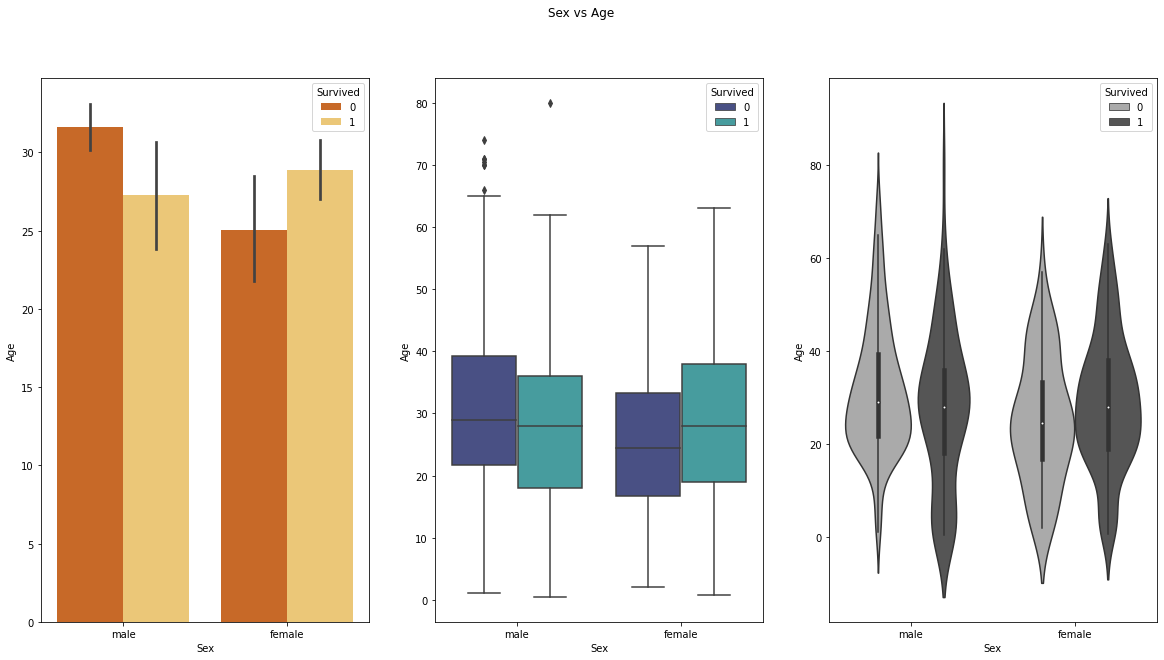

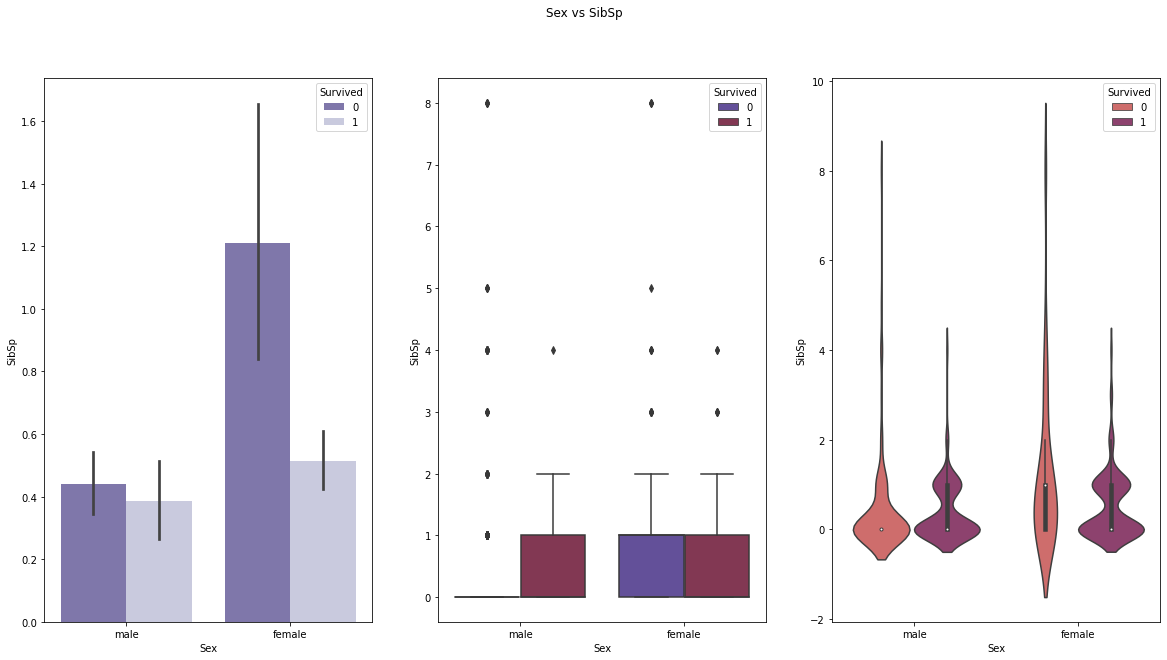

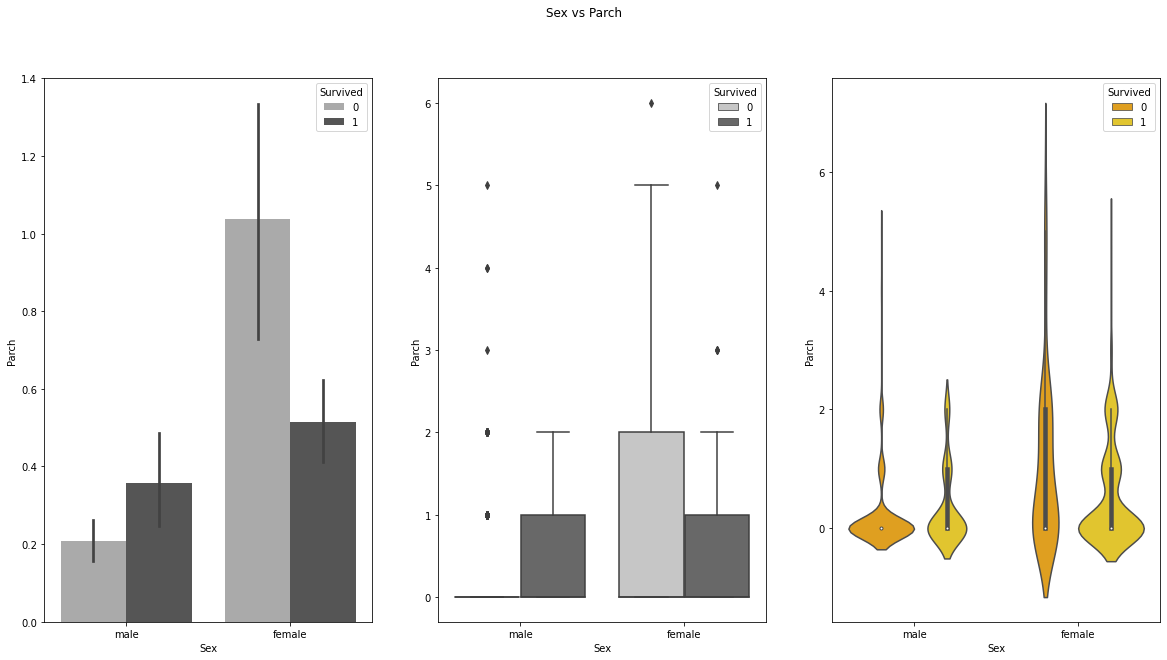

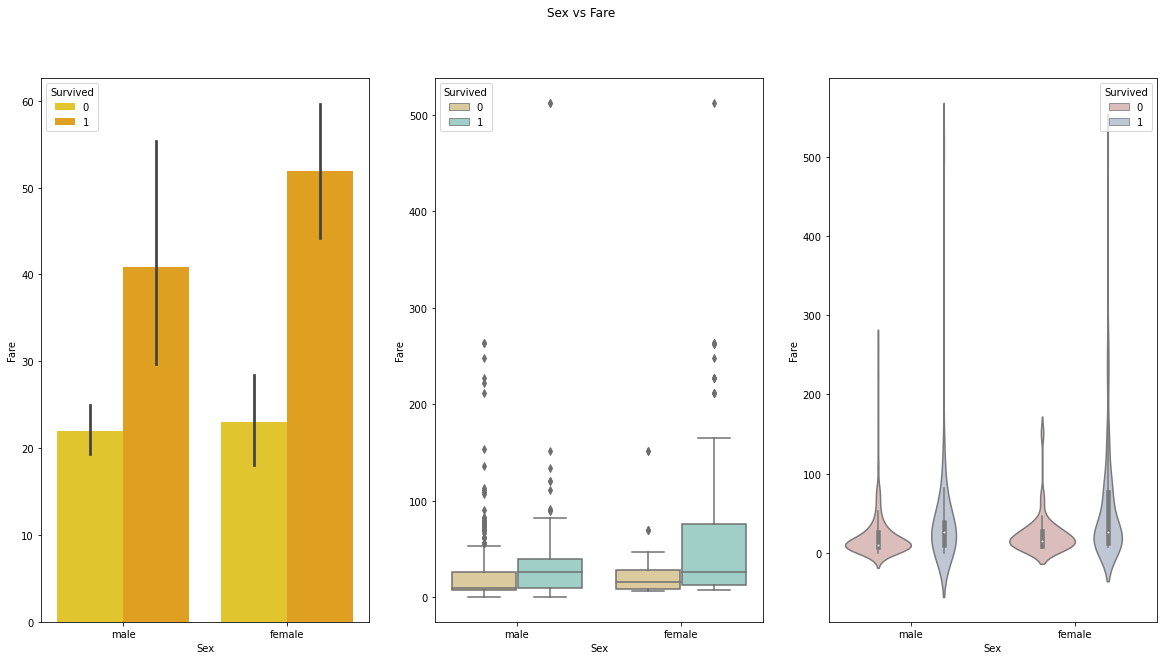

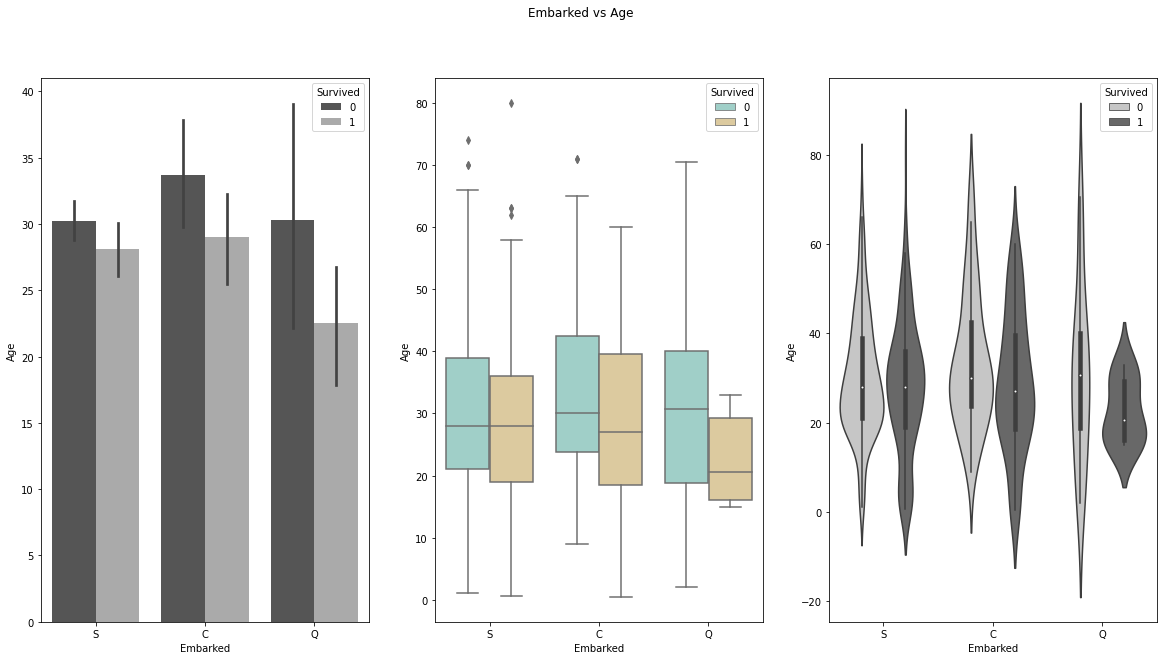

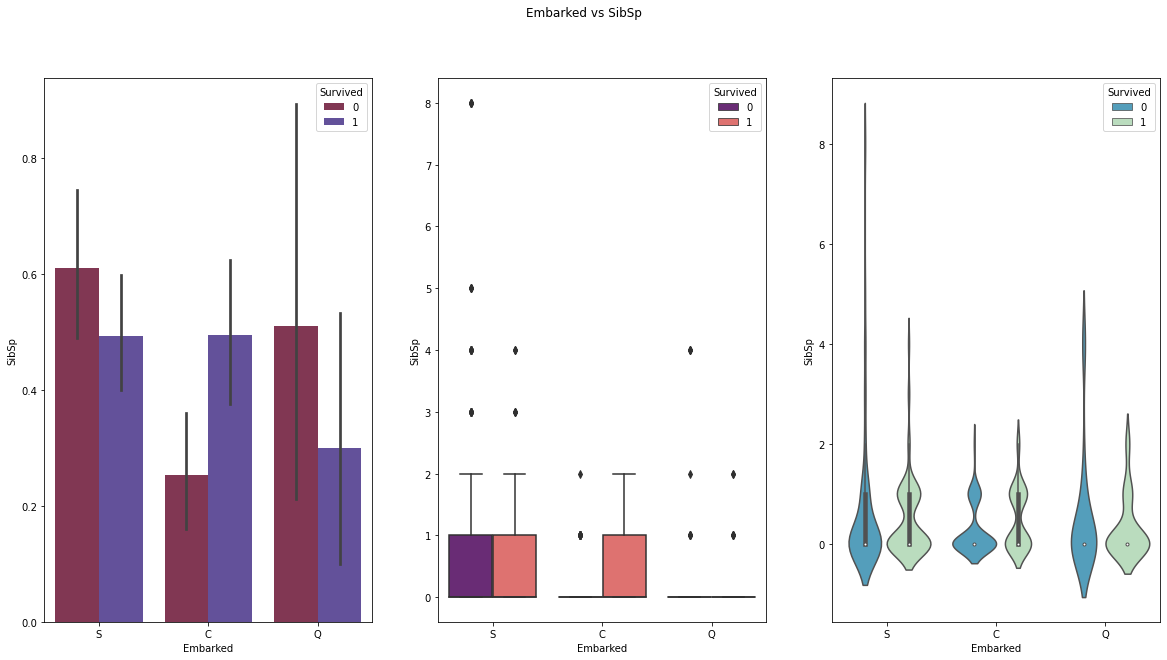

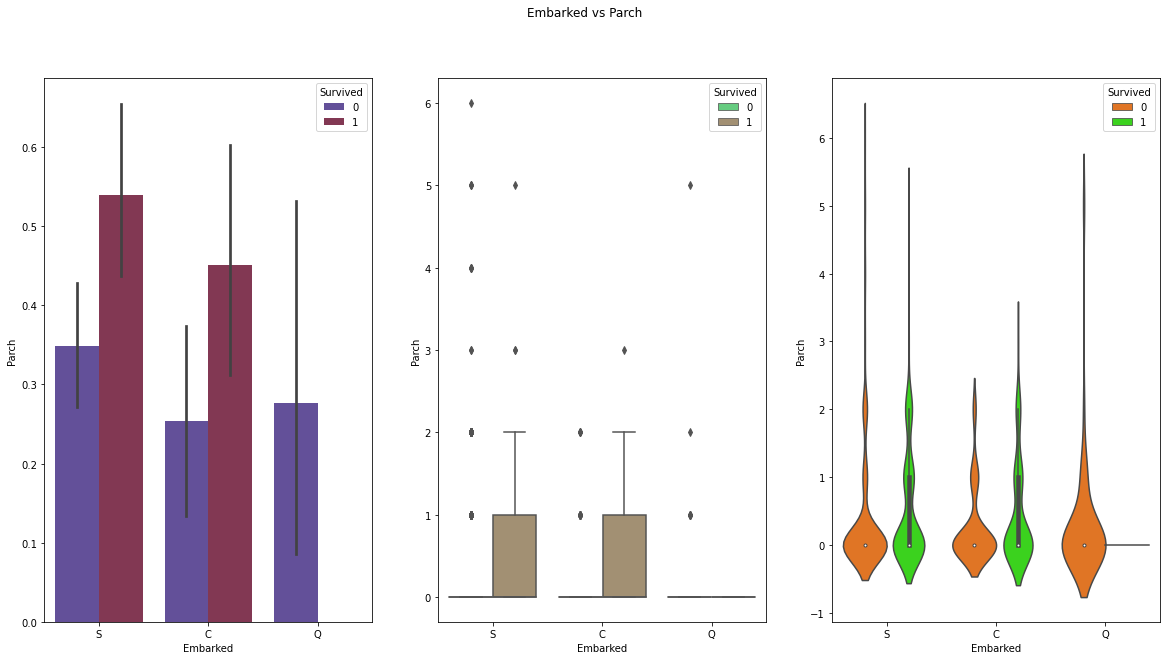

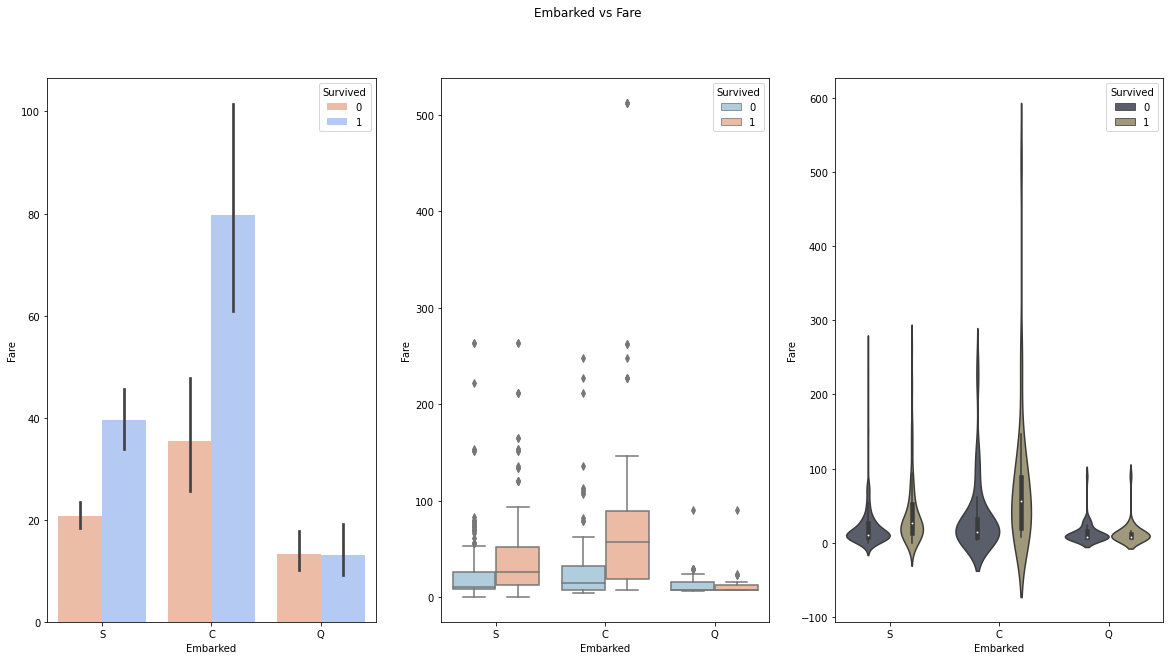

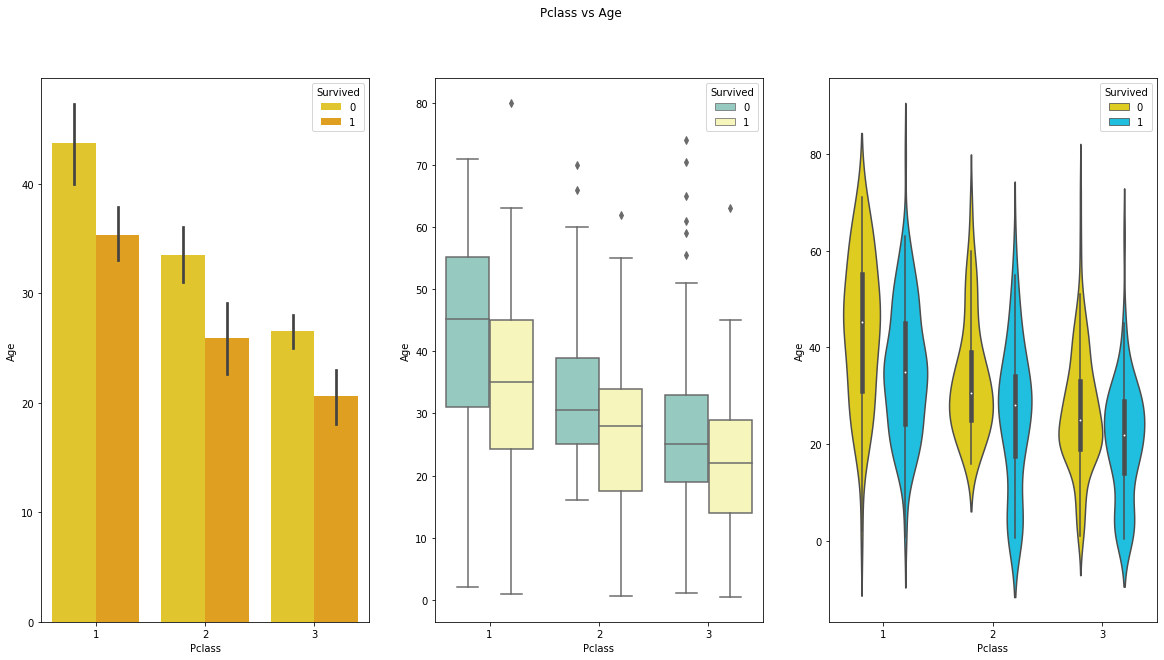

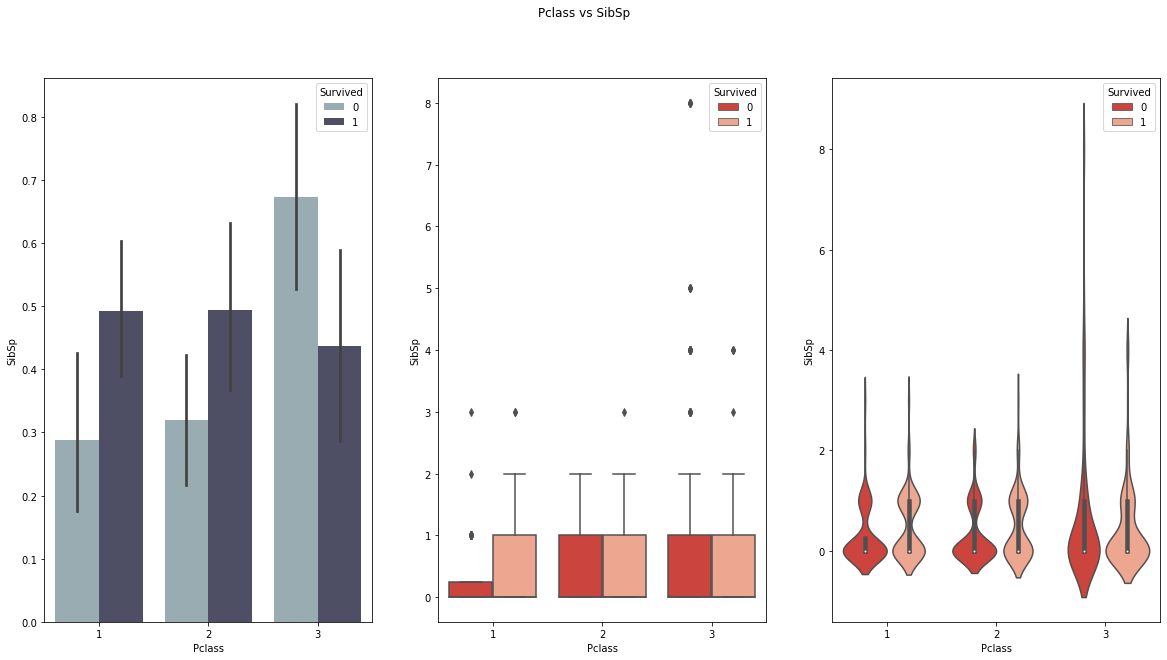

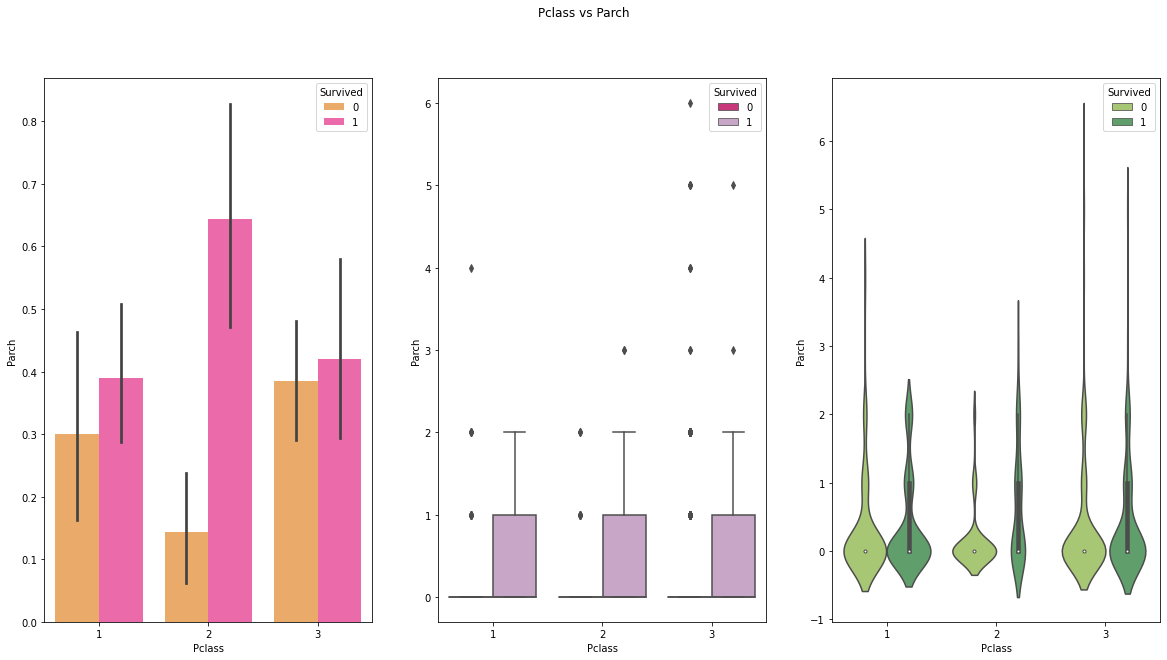

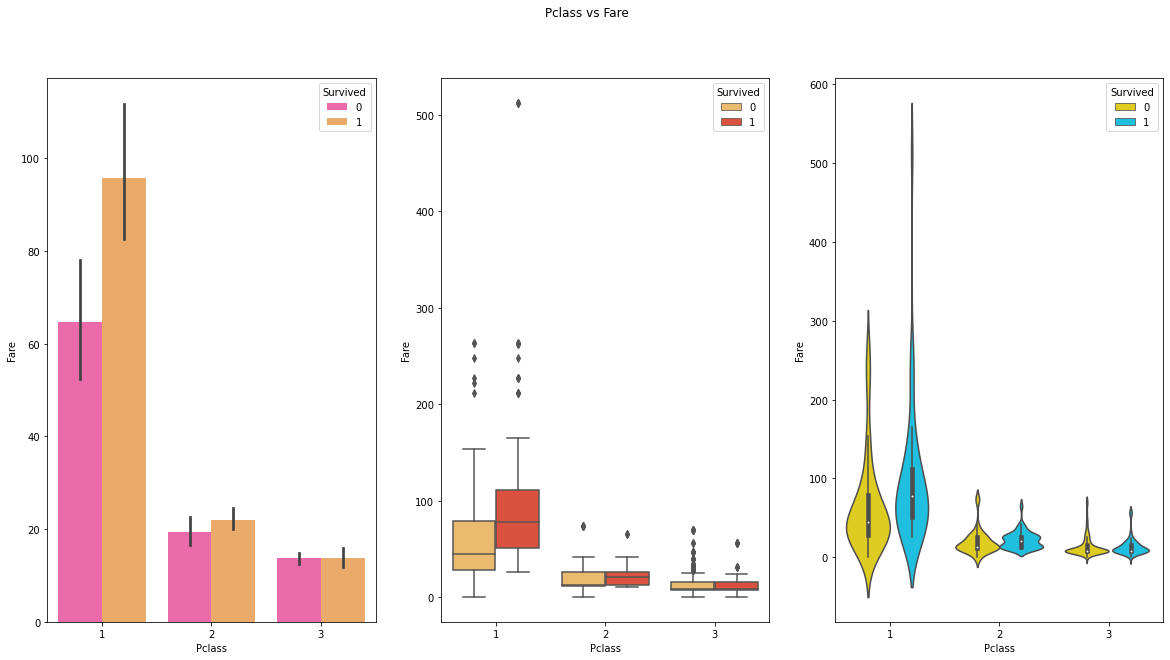

In [44]:
for col in cat_cols:
    if col == target:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(20,10))
        plt.suptitle(f'{col} vs {ncol}')
        plt.subplot(1,3,1)
        sns.barplot(data=df,x=col,y=ncol,hue=target,palette=choice(list))
        plt.subplot(1,3,2)
        sns.boxplot(data=df,x=col,y=ncol,hue=target,palette=choice(list))
        plt.subplot(1,3,3)
        sns.violinplot(data=df,x=col,y=ncol,hue=target,palette=choice(list))
        plt.show()

* Now we will drop the unwanted columns

In [45]:
df.drop(Drop_cols,axis=1,inplace=True)

# Again checking for missing data

In [46]:
pd.isnull(df).sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:>

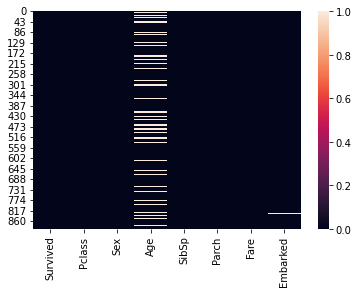

In [47]:
sns.heatmap(pd.isnull(df))

In [48]:
# We will try to fill missing enteries in Age
df['Age'].fillna(df["Age"].mean()).mean()

29.699117647058763

In [49]:
#Impute the Missing Enteries in the Age
def age_imputer(data):
    age=data['Age']
    pclass=data["Pclass"]
    sex=data['Sex']

    if pd.isnull(age):
        return df['Age'][(df['Pclass']==pclass)&(df['Sex']==sex)].mean()
    else:
        return age

df['Age']=df.apply(age_imputer,axis=1)

<AxesSubplot:>

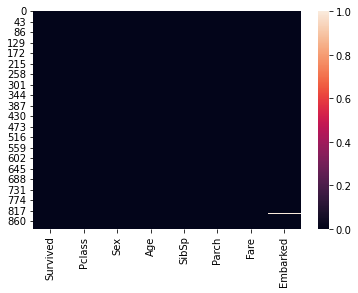

In [50]:
# Checking again
sns.heatmap(pd.isnull(df))
# Now only embarked is remaining

In [51]:
df.dropna(inplace=True)
#Pandas dropna() method allows the user to analyze and drop Rows/Columns with Null values in different ways

<AxesSubplot:>

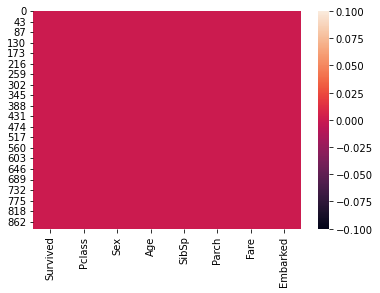

In [52]:
sns.heatmap(pd.isnull(df))

In [53]:
100*pd.isnull(df).sum()/len(df)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [54]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


* only categorical data is sex 

In [55]:
# String Data Preprocessing/ Creating Dummy for string
data=pd.get_dummies(df).drop('Sex_female',axis=1)

In [56]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


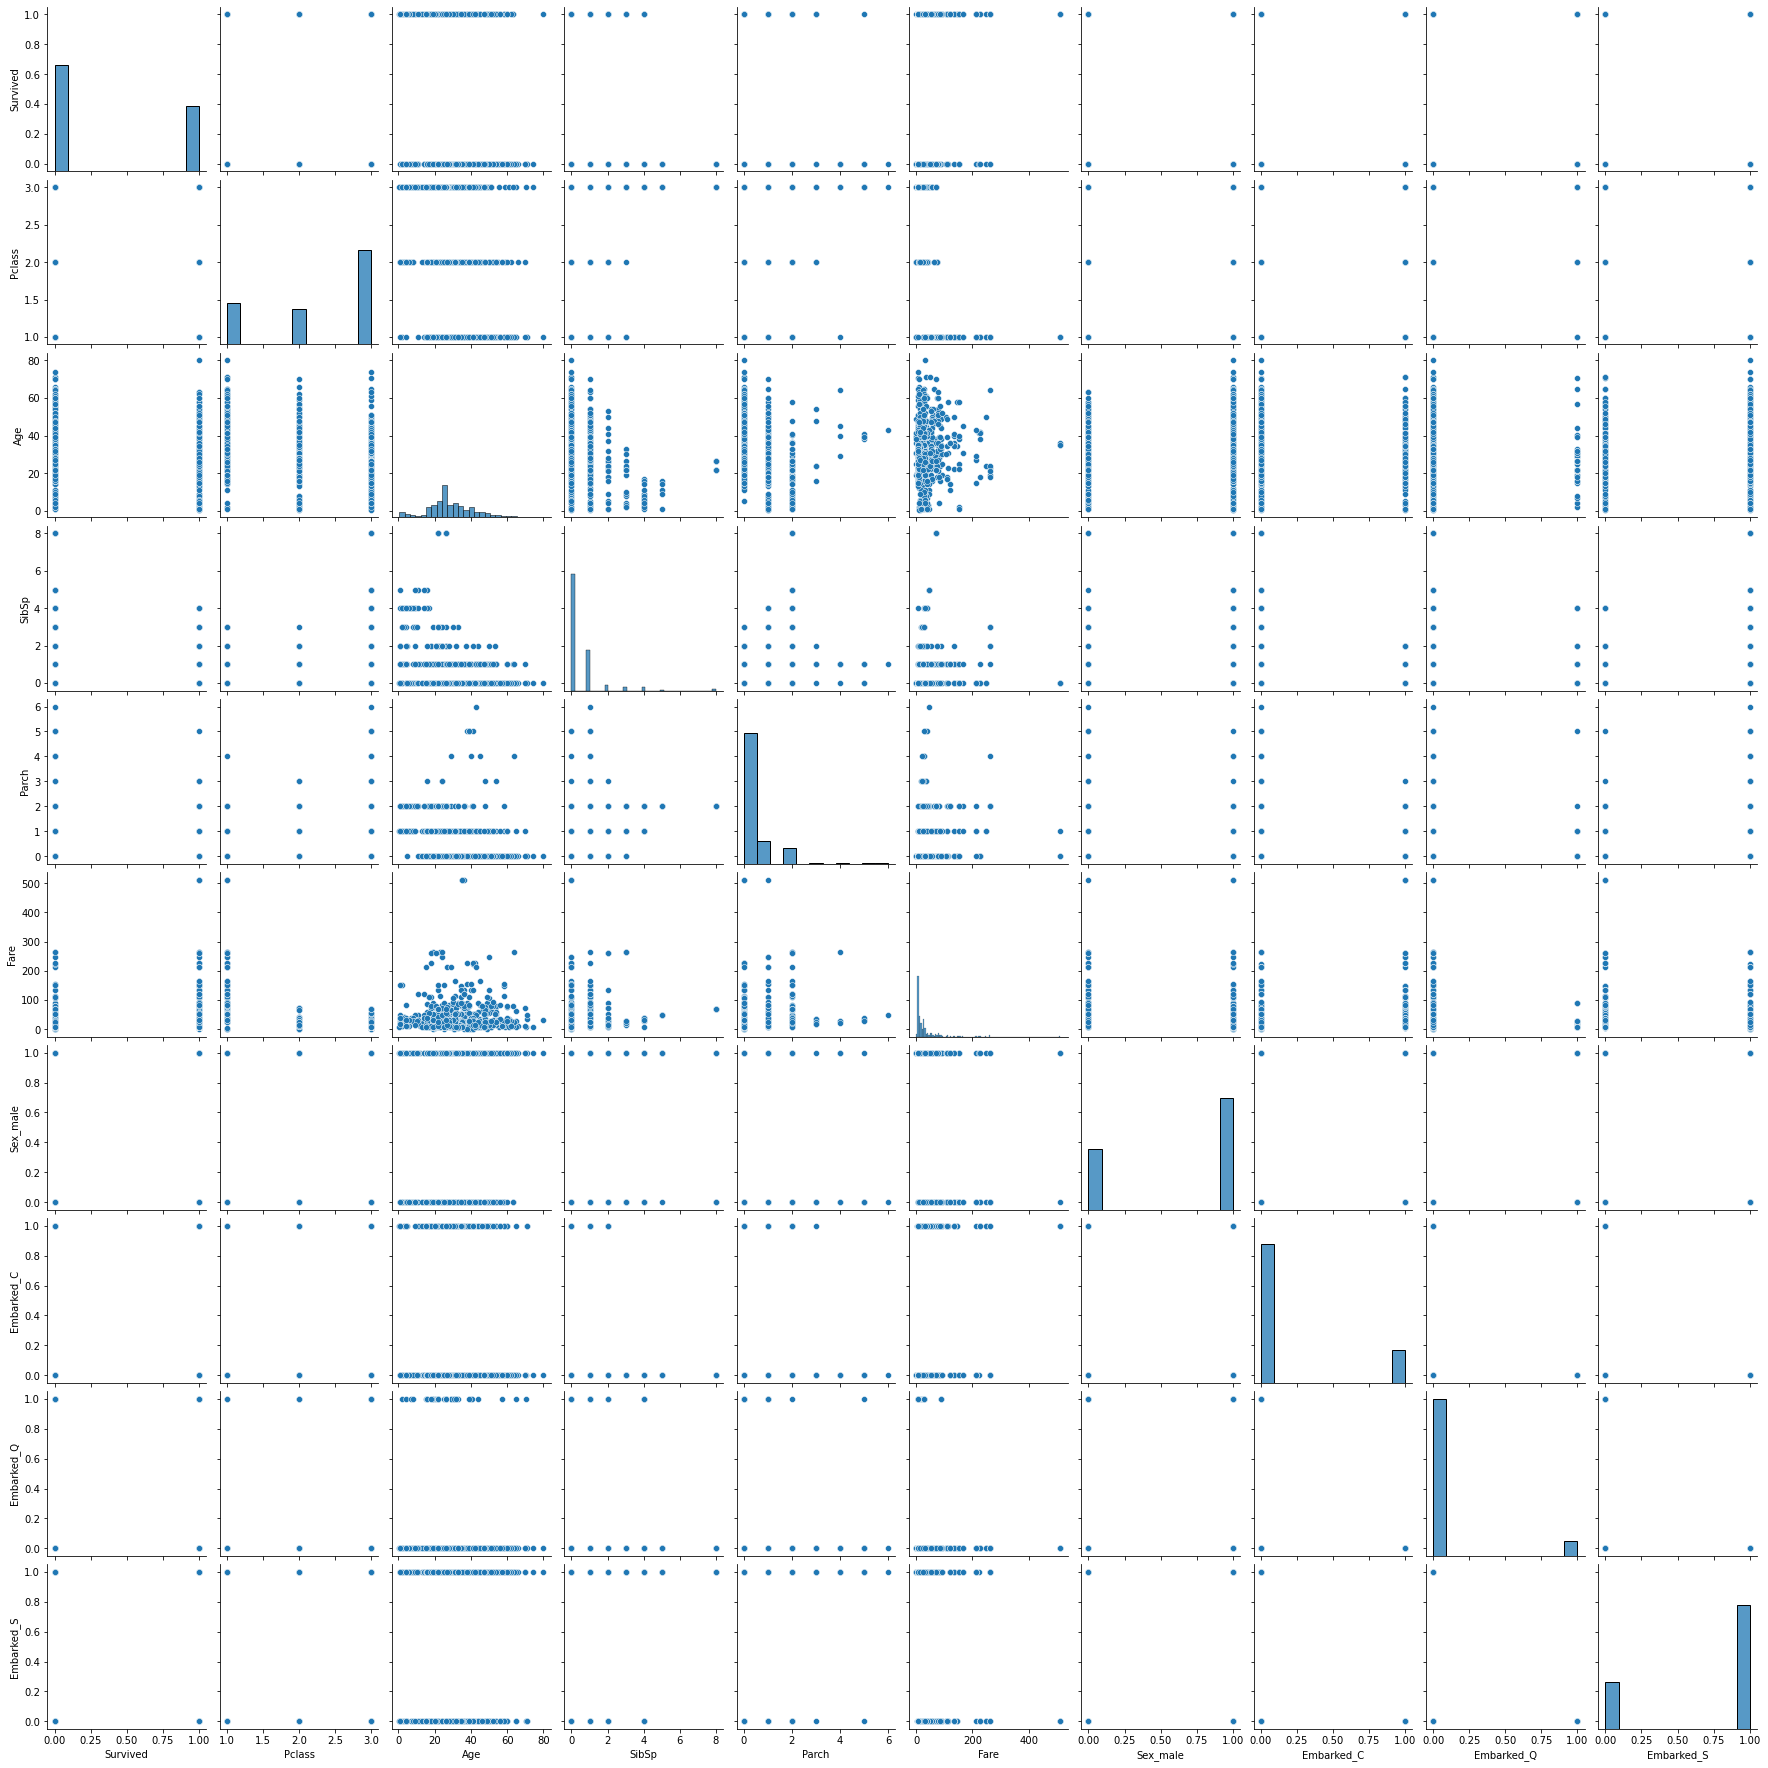

In [57]:
sns.pairplot(data=data)

In [58]:
Target_col=data[target]
Feature_col=data.drop(target,axis=1)#All of them are features excluding target column which was survival

In [59]:
Feature_col.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


In [60]:
Target_col.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

* Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1.
*   It utilizes a sigmoid function and works best on binary classification problems, although it can be used on multi-class classification problems through the “one vs. all” method. Logistic regression (despite its name) is not fit for regression tasks. 

# Why we Decided Logistic Regression
1. Its Binary categorical Target and Features are mixture of numerical and categorical both,then i can think of Logistic Regression Classification(as the prediction is in categorical so we have to use classification)

In [61]:
#Splitting Data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Feature_col,Target_col,test_size=0.25,random_state=101)
#This Random state is allowing us to retain same values of training and testing data every time we want to reproduce another model

# Model Creation

In [62]:
ytrain.shape

(666,)

In [63]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

# Model Evaluation

In [64]:
print(100*model.score(xtest,ytest))
#83 is not a good score till now so we refer to cofusion matrix and classification report 

83.40807174887892


# Metrics
* The sklearn.metrics module implements several loss, score, and utility functions to measure classification performance

# Classification
* Classification is a process of categorizing a given set of data output using the input data.In this case we will be categorizing the output into two (Might Survive or Might not Survive)
* Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain
* Classification algorithms used in machine learning utilize input training data for the purpose of predicting the likelihood or probability that the data that follows will fall into one of the predetermined categories. One of the most common applications of classification is for filtering emails into “spam” or “non-spam”

# Confusion Martrix
* A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known. The term confusion matrix itself is very simple, but its related terminology can be a little confusing. 
* The confusion matrix visualizes the accuracy of a classifier by comparing the actual and predicted classes. 
* It consists of a matrix of 2 by 2 
* TP: True Positive: Predicted values correctly predicted as actual positive
* FP: Predicted values incorrectly predicted an actual positive. i.e., Negative values predicted as positive
* FN: False Negative: Positive values predicted as negative
* TN: True Negative: Predicted values correctly predicted as an actual negative
----------------------------------------------
 TN FP 
*******
 FN TP

# Classification Report
* It is one of the performance evaluation metrics of a classification-based machine learning model. It displays your model’s precision, recall, F1 score and support. It provides a better understanding of the overall performance of our trained model.
* Precision:-Precision is defined as the ratio of true positives to the sum of true and false positives.(TP/TP+FP)
* Recall:-Recall is defined as the ratio of true positives to the sum of true positives and false negatives.(TP/TP+FN)
* F1 Score:-The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.(2*(precision*recall)/(precision+recall))
* Supoort:- Support is the number of actual occurrences of the  Output class(Survived or not) in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

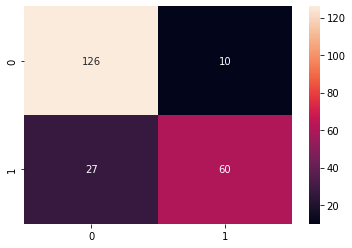

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [65]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict=model.predict(xtest)#Here the ytest is the actual truth and the y_pred is the prediciton made by our Model
sns.heatmap(confusion_matrix(ytest,y_predict),annot=True,fmt='d')
plt.show()
print(classification_report(ytest,y_predict))

In [66]:
ytest.shape
print(ytest.value_counts())
#Here you can see the actual results of our data

0    136
1     87
Name: Survived, dtype: int64


In [67]:
y_predict.shape

(223,)

In [68]:
print(pd.Series(y_predict).value_counts())
#Here you can see the prediction of those who didn't Survive are actually more because it is taking (TP+FN) as a whole and on that it is predicting these are the number of people which didn't survive(Which actually is not the Truth)
# Same in the Case of those who did Survive are more because it is again taking (TP+FP) (Which is actually not the Truth)


0    153
1     70
dtype: int64


* This shows that our model is Biased 

# Class Imbalance
* Class imbalance refers to a problem in machine learning where the classes in the data are not equally represented. For example, if there are 100 data points and 90 of them belong to Class A and 10 belong to Class B, then the classes are imbalanced. Class imbalance can lead to problems with training machine learning models because the models may be biased towards the more common class

# Improving Our Biased Model
* By Balancing
* By Hyperparameter tuning
* Cross Validation

# Hyperparameter
* "Hyperparameters are defined as the parameters that are explicitly defined by the user to control the learning process."(Train_test_split is a hyperparameter)
* These are used to specify the learning capacity and complexity of the model.
* One cannot know the exact best value for hyperparameters for the given problem. The best value can be determined either by the rule of thumb or by trial and error.
* Some examples of Hyperparameters are the learning rate for training a neural network, K in the KNN algorithm.


# Hyperparameter tuning
* The process of selecting the best hyperparameters for any machine learning algorithm is known as hyperparameter tuning

# Remember to learn Types of Hyperparameter Tuning

In [69]:
#Putting Class Weights /Hyperparam
model1=LogisticRegression(class_weight={0:0.7,1:0.3},random_state=101)# here 0:0.7 means 0 class is assigned a weight of 0.7 and 1:0.3 means the class 1 is assigned the weight of 0.3
model1.fit(xtrain,ytrain)
print(classification_report(ytest,model1.predict(xtest)))
#This didn't work as the F1-score reduces for the class 1

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       136
           1       0.97      0.45      0.61        87

    accuracy                           0.78       223
   macro avg       0.86      0.72      0.73       223
weighted avg       0.83      0.78      0.76       223



# Cross Validation
* Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.
* In this method, we perform training on the 50% of the given data-set and rest 50% is used for the testing purpose. The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model i.e higher bias.(This is the Default one)
* There are Two types-:
 1. LOOCV (Leave One Out Cross Validation)-:In this method, we perform training on the whole data-set but leaves only one data-point of the available data-set and then iterates for each data-point. It has some advantages as well as disadvantages also. train data is 99% and 1% is testing data
 2. K-Fold Cross Validation-:In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model.

In [70]:
#Trying Cross Validation
# xtrain,xtest,ytrain,ytest=train_test_split(Feature_col,Target_col,test_size=0.5,random_state=101)

In [71]:
# model2=LogisticRegression()
# model2.fit(xtrain,ytrain)

In [72]:
# sns.heatmap(confusion_matrix(ytest,model2.predict(xtest)),annot=True,fmt='d')
# plt.show()
# print(classification_report(ytest,model2.predict(xtest)))
# #This also didn't Work as this is making our model more biased

# Optimizing Our Model

In [73]:
#These algo are the different formula in our Logistic Regression Algorithm ,These are used in order to find the best algo (Which is least biased towards anything)
for algo in ['newton-cg','lbfgs','liblinear','sag','saga']:
    modelalgo = LogisticRegression(solver=algo,random_state=101)
    print(algo)
    modelalgo.fit(xtrain,ytrain)
    print(classification_report(ytest,modelalgo.predict(xtest)))
    #Here lbfgs gives the best F1 score among all 

newton-cg
              precision    recall  f1-score   support

           0       0.82      0.93      0.88       136
           1       0.87      0.69      0.77        87

    accuracy                           0.84       223
   macro avg       0.85      0.81      0.82       223
weighted avg       0.84      0.84      0.83       223

lbfgs
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223

liblinear
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.68      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.80      0.81       223
weighted avg       0.83      0.83      0.83     

In [74]:
# As this model is not Improving we should not consider it as the score is low if we compared it to other models
# Criticalness of the Situation

# Decision Tree Algorithm
* Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems.
* Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

# Working of the Decision Tree Algorithm
* In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of the root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.
* For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further.

# Steps-:
* Step-1: Begin the tree with the root node, says S, which contains the complete dataset.
* Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
* Step-3: Divide the S into subsets that contains possible values for the best attributes.
* Step-4: Generate the decision tree node, which contains the best attribute.
* Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

# ASM(Attribute Selection Measures)
* Information Gain
* Entropy

# Pruning
* Pruning is when we selectively remove branches from a tree. The goal is to remove unwanted branches, improve the tree’s structure, and direct new, healthy growth.

In [75]:
Feature_col.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [76]:
xtrain,xtest,ytrain,ytest

(     Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_C  \
 127       3  24.000000      0      0   7.1417         1           0   
 133       2  29.000000      1      0  26.0000         0           0   
 619       2  26.000000      0      0  10.5000         1           0   
 439       2  31.000000      0      0  10.5000         1           0   
 374       3   3.000000      3      1  21.0750         0           0   
 ..      ...        ...    ...    ...      ...       ...         ...   
 576       2  34.000000      0      0  13.0000         0           0   
 840       3  20.000000      0      0   7.9250         1           0   
 338       3  45.000000      0      0   8.0500         1           0   
 524       3  26.507589      0      0   7.2292         1           1   
 865       2  42.000000      0      0  13.0000         0           0   
 
      Embarked_Q  Embarked_S  
 127           0           1  
 133           0           1  
 619           0           1  
 439      

In [77]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [78]:
print(classification_report(ytest,model_dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       136
           1       0.65      0.68      0.66        87

    accuracy                           0.73       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.73      0.73      0.73       223



* Here you can see Decision Tree F1 score is less meaning the prediction made by model is less accurate

In [79]:
model_dt

DecisionTreeClassifier()

In [85]:
# In order to find the importance of each attribute which can be used root node
pd.DataFrame(model_dt.feature_importances_,index=xtrain.columns,columns=["Importance"]).sort_values(by='Importance',ascending=False)

,Importance
Sex_male,0.298897
Fare,0.255771
Age,0.239065
Pclass,0.102157
SibSp,0.060279
Parch,0.025165
Embarked_C,0.017479
Embarked_Q,0.001069
Embarked_S,0.000118


* Here You can see the Sex_male attributes are the most important ones

In [86]:
import_cols=['Sex_male','Fare','Age']

In [91]:
model_dt2=DecisionTreeClassifier()
model_dt2.fit(xtrain[import_cols],ytrain)
print(classification_report(ytest,model_dt2.predict(xtest[import_cols])))


              precision    recall  f1-score   support

           0       0.78      0.74      0.76       136
           1       0.63      0.68      0.65        87

    accuracy                           0.72       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.72      0.72      0.72       223



* Even using Important Attributes in Out Decision Tree it didnot improve our model score 

# Random Forest Classifier
* Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.[1][2] Random decision forests correct for decision trees' habit of overfitting to their training set.[3]: 587–588  Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees.[citation needed] However, data characteristics can affect their performance.[4][5]

In [99]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier().fit(xtrain[import_cols],ytrain)
print(classification_report(ytest,model_rf.predict(xtest[import_cols])))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       136
           1       0.77      0.67      0.72        87

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



In [100]:
model_Lr_imp=LogisticRegression().fit(xtrain[import_cols],ytrain)
print(classification_report(ytest,model.predict(xtest[import_cols])))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       136
           1       0.78      0.67      0.72        87

    accuracy                           0.80       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.80      0.80      0.79       223



In [101]:
pd.to_pickle(model_rf,'Titanic(Machine_learning).pickle')